In [1]:
import os
import h5py
import numpy as np 

In [2]:
import corner as DFM
import matplotlib.pyplot as plt

```
README for file with 21cmfast outputs (JBM May 13th 2022)

open with h5py, say f1 = h5py.File(AllFile3.h5,'r'), then keys are

['AveDatas', 'LFDatas_10', 'LFDatas_12', 'LFDatas_15', 'LFDatas_6',
'LFDatas_7', 'LFDatas_8', 'TauDatas', 'TotalPSDatas', 'WalkerCosmologys',
'Walkers', 'walkerIDs']


###GLOBAL QUANTITIES:

To read the redshifts simply do:
f1['AveDatas'][0,:,0]

the first index is the walker, 2nd is z, third is the global quantiy: (z,
xHI, T21, ...)

###PARAMETERS:

The (astro)  parameters are in
f1['Walkers']
and are ordered in some way I haven't figured out yet. Most likely [1] is
log10f* and [2] is alpha*, (TODO)

For reference, Aux file subindex.bin has the indices of the models that
are in the posterior.


###POWER SPECTRA:

The 21cm PS (in units of mK^2) are saved in
f1['TotalPSDatas']

the structure is
[#model,#wavenumber, 1+#redshifts].

That means that klist = f['TotalPSDatas'][0,:,0],
and there are 16 k in klist for this run, and 84 redshifts
(nz=len(f1['TotalPSDatas'][0,0,:])-1)
Then, for each model imodel and z index iz the PS vs k is
f1['TotalPSDatas'][imodel,:,1+iz]
(since the [,,0] element is the value of k)
```

```
Comments from Yuxiang Qin:
I assume you are looking for models in Fig 6 (instead of Fig 4)? They are
stored as normalL_HERA  and normalL_noHERA in
/home/yqin/projects/aidamc/HERA/results . You should have access but let
me know if you don't.

All outputs including those which are not in the posterior are stored in
Programs/KEEP_MCMC_DATA/AllFile.h5 and, in order to extract models that
are in the posterior, you can read their indices in the h5 file from
Programs/KEEP_MCMC_DATA/subindex.bin by e.g.
np.fromfile('./subindex.bin',dtype=np.int64) .

Now, the 21cm PS are stored as a 3D array with a shape of [#model,
#wavenumber, 1+#redshifts]. You can get the wavenumbers by e.g.
f['TotalPSDatas'][0,:,0] (the first 0 is because they are the same among
all models, while the second 0 is where the wavenumbers are stored). the
powers are therefore f['TotalPSDatas'][:,:,1:][subindex] (note here I'm
calling subindex mentioned above to get only models in the posterior).
Finally, the redshift information can be extracted from e.g.,
f['AveDatas'][0,:,0] .


Let me know if these are not clear and if you would like me to simply send
you the cleaned data. If so, let me know which redshifts of the PS you
would like to have. e.g. below was a figure showing the posterior in terms
of the PS for the two models. If your preferred redshifts are not among
these (and the other 72 pre-defined redshifts), I might need to do
interpolation to get them.
```

In [3]:
dat_dir = '/scratch/gpfs/chhahn/21cmlfi/'
chain = h5py.File(os.path.join(dat_dir, 'AllFile3.h5'), 'r')

In [4]:
subindex = np.fromfile(os.path.join(dat_dir, 'subindex.bin'), dtype=np.int64)

In [5]:
_params = chain['Walkers'][...]

i_params = np.array([1,2,3,4,5,6,10,11,14]) # indices of parameters

#params = _params[:,np.std(chain['Walkers'][...], axis=0) > 1e-9]
params = _params[:,i_params][subindex]

In [6]:
lbl_params = np.array([r"$\log_{10} f_{*,10}$",
                       r"$\alpha_*$",
                       r"$\log_{10} f_{\rm esc, 10}$",
                       r"$\alpha_{\rm esc}$",
                       r"$\log_{10}[M_{\rm turn}/{\rm M}_{\odot}]$",
                       r"$t_*$",
                       r"$\log_{10}\frac{L_{\rm X<2keV}/{\rm SFR}}{{\rm erg\ s^{-1}\ M_{\odot}^{-1}\ yr}}$",
                       r"$E_0/{\rm keV}$",
                       r"$\alpha_{\rm X}$"])

prior_params = [[-3,0], [-0.5,1], [-3,0],[-1,0.5], [8,10], [0.01,1], [38,42], [0.1,1.5], [-1,3]]

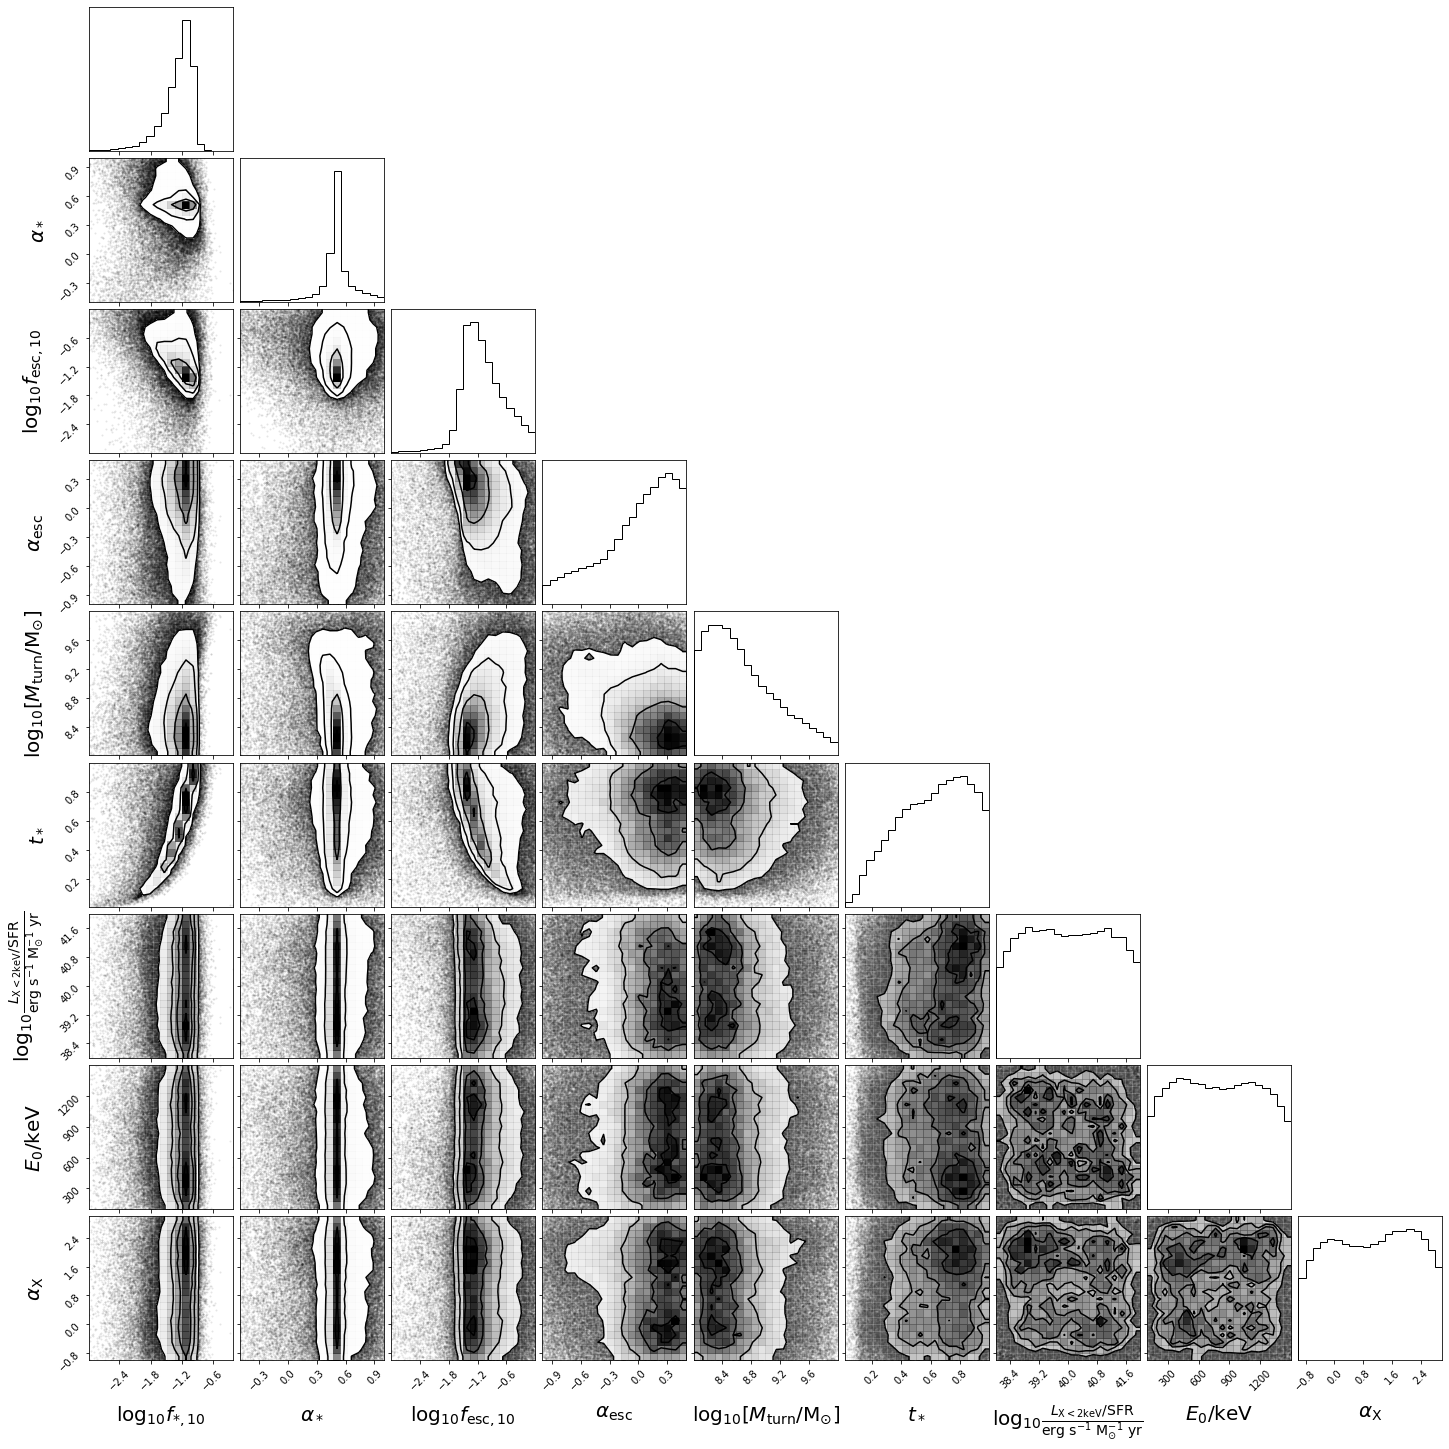

In [7]:
fig = DFM.corner(params, labels=lbl_params, label_kwargs={'fontsize': 20})

In [8]:
redshifts = chain['AveDatas'][0,:,0]
wave_num = chain['TotalPSDatas'][...][0,:,0]
powerspec = chain['TotalPSDatas'][...][:,:,1:]

In [9]:
redshifts

array([34.7026  , 34.00255 , 33.31622 , 32.64336 , 31.98368 , 31.33694 ,
       30.70289 , 30.08126 , 29.47183 , 28.87434 , 28.28857 , 27.71428 ,
       27.15126 , 26.59927 , 26.05811 , 25.52756 , 25.00741 , 24.49747 ,
       23.99751 , 23.50737 , 23.02683 , 22.55572 , 22.09384 , 21.64102 ,
       21.19708 , 20.76185 , 20.33514 , 19.91681 , 19.50668 , 19.10458 ,
       18.71038 , 18.3239  , 17.945   , 17.57353 , 17.20934 , 16.85229 ,
       16.50225 , 16.15907 , 15.82262 , 15.49276 , 15.16937 , 14.85233 ,
       14.5415  , 14.23676 , 13.938   , 13.6451  , 13.35794 , 13.07641 ,
       12.80041 , 12.52981 , 12.26452 , 12.00443 , 11.74944 , 11.49946 ,
       11.25437 , 11.01409 , 10.77852 , 10.54757 , 10.32114 , 10.09916 ,
        9.881531,  9.668168,  9.458988,  9.25391 ,  9.052854,  8.855739,
        8.662489,  8.473028,  8.287283,  8.10518 ,  7.926647,  7.751615,
        7.580015,  7.411779,  7.246843,  7.08514 ,  6.926608,  6.771184,
        6.618808,  6.46942 ,  6.322961,  6.179374, 

In [10]:
wave_num

array([0.02513274, 0.03820577, 0.05725007, 0.07778031, 0.101638  ,
       0.1347107 , 0.1815186 , 0.2444601 , 0.3299734 , 0.4460977 ,
       0.6021986 , 0.8131821 , 1.097917  , 1.480195  , 1.920623  ,
       2.388536  ])

In [17]:
np.argmin(np.abs(redshifts - 7.9))

70

In [16]:
redshifts[np.argmin(np.abs(redshifts - 7.9))]

7.926647

$${\bf x} = [ \Delta_{21}^2 (k = 0.17 {\rm Mpc}^{-1}, z = 10.4), \Delta_{21}^2 (k = 0.13 {\rm Mpc}^{-1}, z = 7.9)]$$

In [33]:
wave_num[5]

0.1347107

In [18]:
# band1 (z = 10.4 and k = 0.17) actually (z = 10.32114, k = 0.1815186)
del21_band1 = powerspec[subindex][:,6,58]

# band2 (z = 7.9 and k = 0.13) actually (z= 7.926647, k= 0.1347107)
del21_band2 = powerspec[subindex][:,5,70]

del21 = np.concatenate([del21_band1[:,None], del21_band2[:,None]], axis=1)

In [24]:
log_del21 = np.log10(del21)

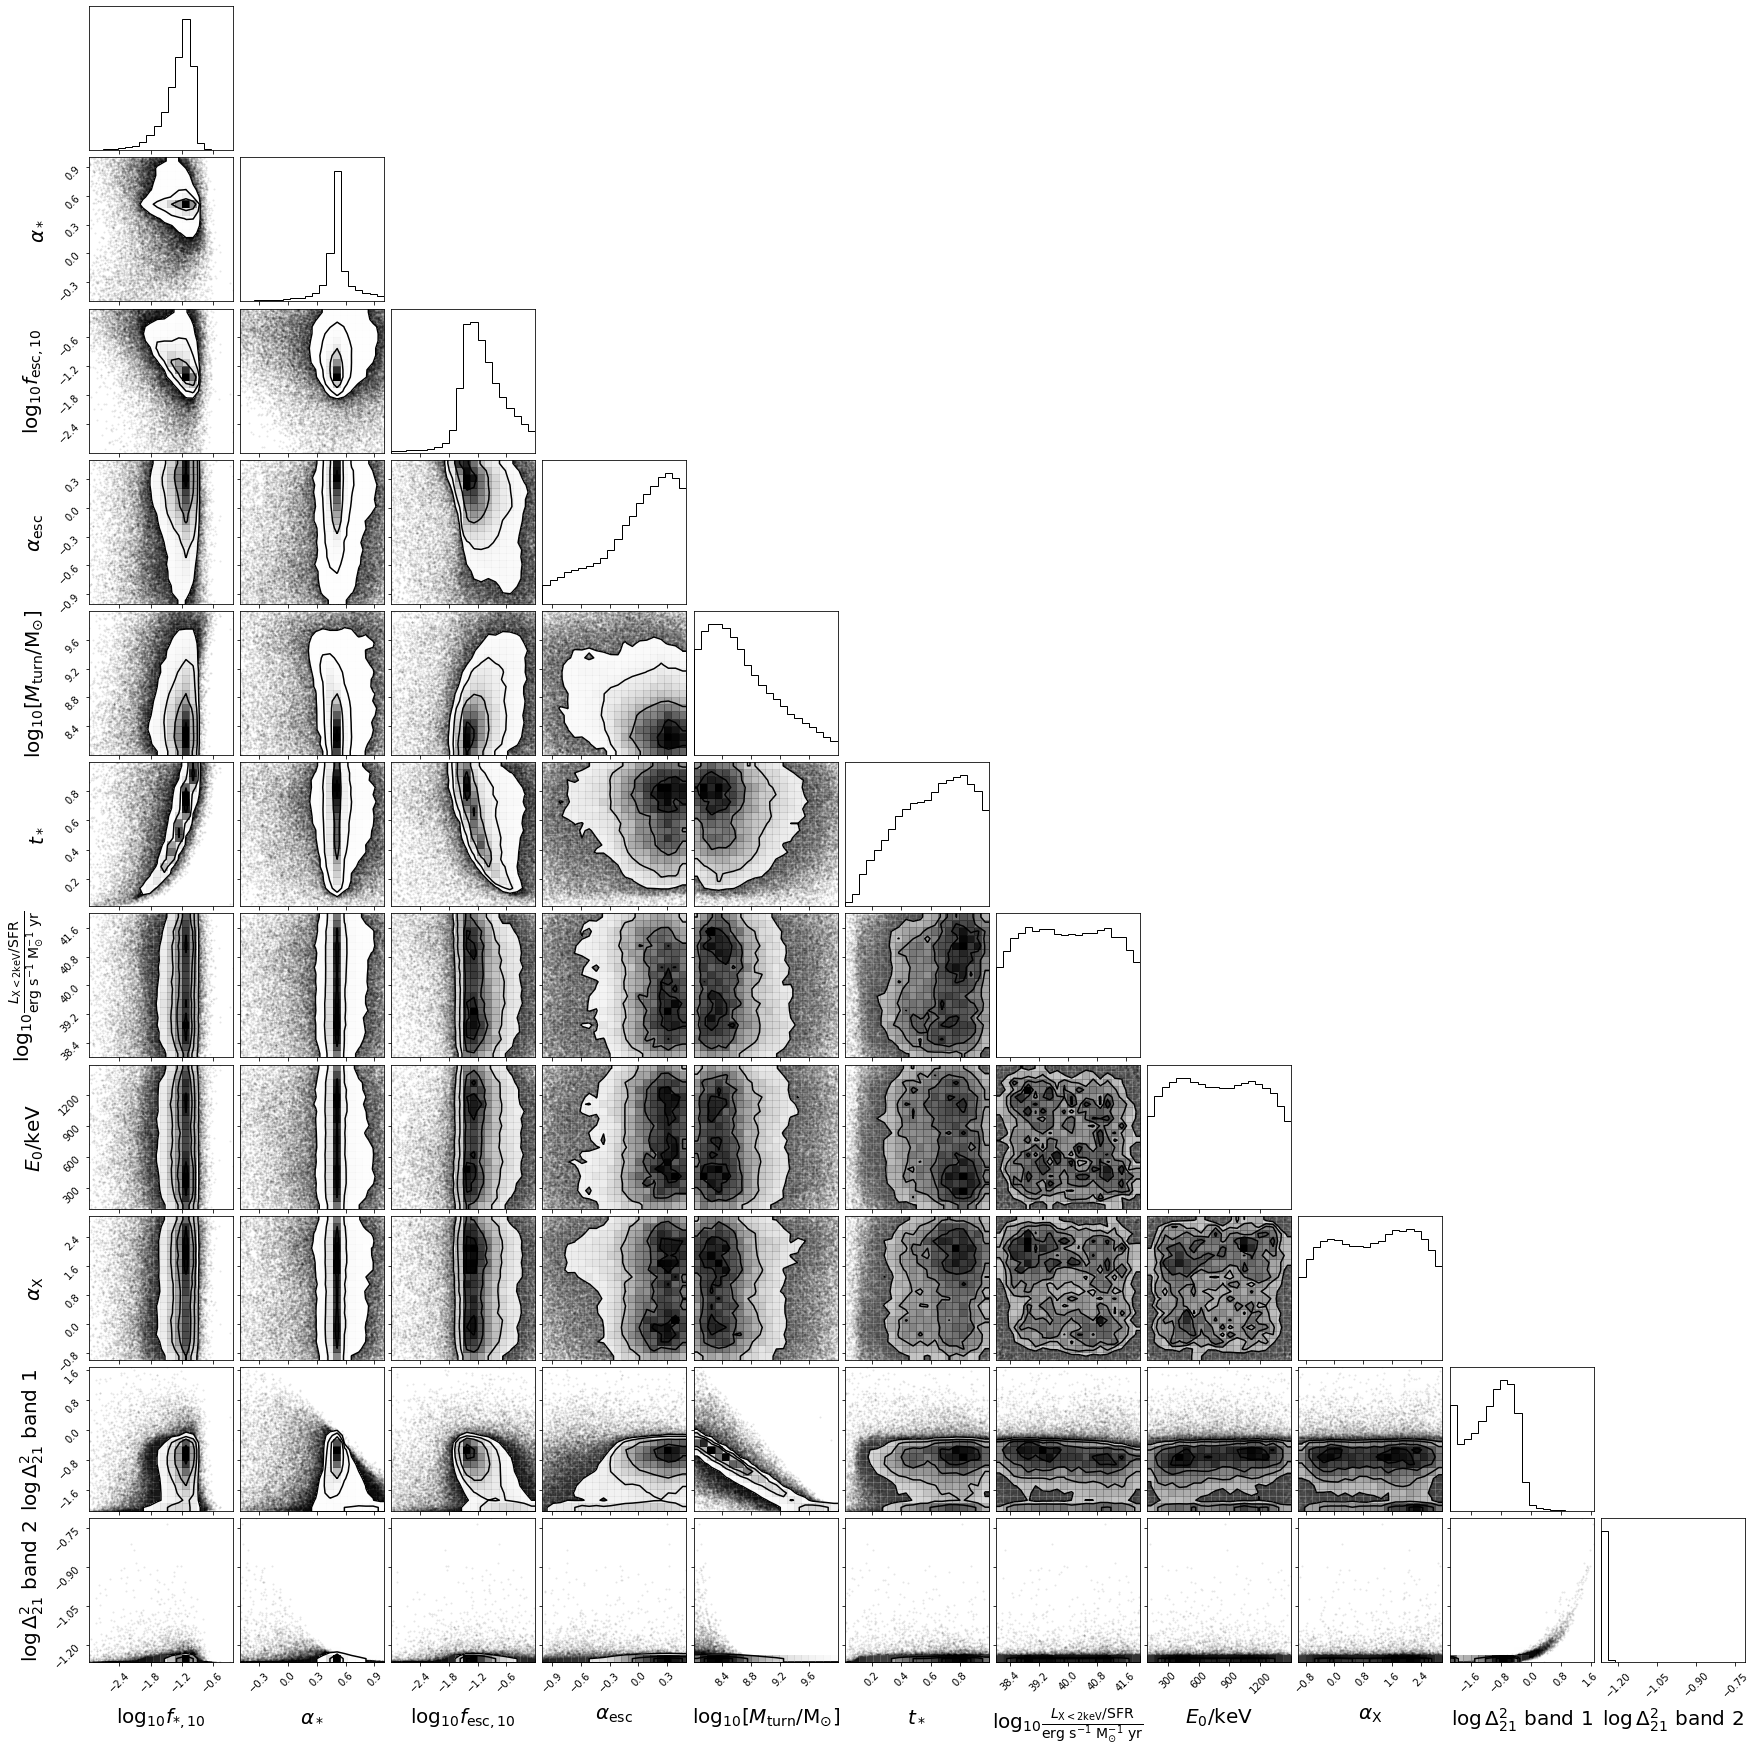

In [25]:
fig = DFM.corner(np.concatenate([params, log_del21], axis=1), 
                 labels=list(lbl_params) + [r'$\log\Delta_{21}^2$ band 1', 
                                      r'$\log\Delta_{21}^2$ band 2'], 
                 label_kwargs={'fontsize': 20})

In [29]:
# save
f = h5py.File(os.path.join(dat_dir, '21cmlfi.hdf5'), 'w')
f.create_dataset('theta', data=params)
f.create_dataset('Del2_21_nonoise', data=del21)
f.close()